# Tarea 1:

En primer lugar, vamos a utilizar la secuencia de una proteína, ya disponible en archivo FASTA: CHRNA7.fas. Además, Swissprot va a ser la base de datos de secuencias en la que voy a buscar homologías, ya que es una base de datos de proteínas instalada localmente en este ambiente y, también, haremos uso del blastp (Altschul et al., 1990), con la finalidad de explorar la distribución taxonómica de la proteína CHRNA7, con diferentes umbrales de valor E, para determinar a qué ritmo aumenta la distribución taxonómica de las secuencias encontradas a medida que se relaja el grado de similitud exigido. Es decir, a medida que acepto como resultados del blastp secuencias con un valor E mayor.

El objetivo de este análisis es explorar la distribución taxonómica de secuencias homólogas a la de la proteína CHRNA7 (*Cholinergic Receptor Nicotinic Alpha 7*). Se trata de una proteína que participa en neuroreceptores de acetilcolina, que fue vinculada inicialmente a un fenotipo neurofisiológico que se encuentra comúnmente en la esquizofrenia, marcado por un déficit de potencial evocado auditivo P50 (Yanagi et al., 2012) y, que según Viscardi et al (2021), apareció durante la evolución temprana de los animales, en el linaje del último antepasado común entre cordados y cnidarios, junto a otras dos proteínas más: CHRM1 y CHRNA3.

En UniProtKB, CHRNA7 está identificada como proteína P36544 (ACHA7_HUMAN), la cual presenta un efecto en el fenotipo de Síndrome de microdeleción 15q13.3 en organismos *Homo sapiens* (Humanos).

En las neuronas de los vertebrados, existen dos tipos principales de receptores de acetilcolina: muscarínicos y nicotínicos. CHRNA3 y CHRNA7, son dos subunidades parálogas de receptor nicotínico de acetilcolina, mientras que, la proteína CHRM1 humana, es un receptor muscarínico de acetilcolina. 

Por último, cabe destacar el uso, para la realización de la tarea, el ejemplo del cuaderno Ejemplo.ipynb que se encuentra dentro del File Browser, en el JupyterLab.

Para hacerlo de forma automática desde R, disponemos en esta carpeta del pequeño *script* de BASH: `preparar_ambiente.sh`. Sólo hace falta ejecutar el bloque siguiente, sin necesidad de salir del cuaderno:

In [3]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

In [6]:
#Inicialmente, ejecutamos una sola búsqueda con blastp. Utilizamos un umbral de valor E de 1.0e-50. 
#Este valor solo nos va a mostrar en los resultados, aquellas secuencias más parecidas a la original 
#debido a la gran exigencia que posee.
BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA7.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

#Entre los argumentos, podemos observar la especificación del formato de salida "-outfmt". 
#El resultado del comando anterior es guardado en "BlastOut01", un texto plano. 
#A continuación, con las funciones textConnection() y read.table(), lo vamos a transformar en un 
#"data frame", es decir, una tabla donde cada columna es una variable. La opción "col.names" en 
#read.table() nos va a servir para dar nombre a las columnas.
TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

#Para saber las dimensiones que presenta la tabla:
dim(TablaOut01)


[1] 120  11

Como vemos, se obtienen 120 resultados. 

In [8]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P36544.5,100.000,502,1,502,1,502,0.00e+00,9606,Homo sapiens,primates
Q866A2.1,99.004,502,1,502,1,502,0.00e+00,9544,Macaca mulatta,primates
P54131.1,94.567,497,6,502,3,499,0.00e+00,9913,Bos taurus,even-toed ungulates
Q05941.2,93.964,497,6,502,6,502,0.00e+00,10116,Rattus norvegicus,rodents
P49582.1,93.964,497,6,502,6,502,0.00e+00,10090,Mus musculus,rodents
P22770.1,92.133,483,20,502,20,502,0.00e+00,9031,Gallus gallus,birds
Q494W8.1,100.000,385,118,502,28,412,0.00e+00,9606,Homo sapiens,primates
P48180.1,44.919,492,10,494,6,497,4.41e-145,6239,Caenorhabditis elegans,nematodes
A8WQK3.2,44.732,503,10,494,7,498,7.60e-145,6238,Caenorhabditis briggsae,nematodes


La tabla de resultados anterior, nos indica, en formato tabla, la existencia de 120 secuencias encontradas, homólogas a la proteína CHRNA7, incluyendo la misma secuencia usada como *query*. Como era de esperar, se observa que dichas proteínas pertenecen al Reino Animal.

Para ver cómo aumenta el número de secuencias a medida que aumenta el umbral de valor E, hemos de repetir la búsqueda unas cuantas veces, con valores del parámetro `-evalue` diferentes. 
Con la función `lapply()` vamos a observar cómo se puede realizar de forma automática. 

El código siguiente, va a ejecutar una búsqueda de **blastp** para cada valor del vector: `Valores_E_maximos`. Nos dará un resultado de una lista de tablas, tal y como la anterior.

In [9]:
Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

#Gracias a la función lapply(), se aplicará una función (segundo argumento) sobre cada uno de los 
#valores de la lista o vector indicados en el primer argumento (Valores_E_maximos). 
#La función que aplicamos la definimos entre llaves ("{}"). 
#Se incluyen todos los pasos necesarios para obtener una tabla de resultados como la anterior.

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA7.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })


El objeto `Lista_de_Tablas` guarda las tablas de resultados de los diez **blastp** ejecutados. Podemos acceder a una tabla individual mediante los dobles corchetes:

In [10]:
tail(Lista_de_Tablas[[3]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
124,Q19351.5,27.557,352,1,336,1,342,9.64e-40,6239,Caenorhabditis elegans,nematodes
125,A5X5Y0.1,29.917,361,34,384,48,392,2.87e-39,9606,Homo sapiens,primates
126,Q8WXA8.2,31.077,325,21,337,45,353,5.79e-38,9606,Homo sapiens,primates
127,Q9JHJ5.1,28.990,307,28,326,30,331,7.08e-38,10090,Mus musculus,rodents
128,G5ECT0.1,29.097,299,51,337,88,384,1.57e-36,6239,Caenorhabditis elegans,nematodes
129,Q9JJ16.1,29.139,302,28,321,30,326,3.35e-36,10116,Rattus norvegicus,rodents


Como podemos ver, si se pone un número bajo, como lo es el número 3, dentro de los corchetes, se obtiene el final de la lista de aquellas proteínas cuyo e-valor es inferior a 1.0e-30. Por tanto, tal y como se observa en la tabla anterior, los resultados son acordes a lo esperado, es decir, homologías dentro del Reino Animal.

Ahora, si seleccionamos un número más elevado, como lo es el número 10, se obtienen aquellas proteínas cuyo e-valor es menor que 1. Debido a este e-valor tan alto, se obtienen resultados muy relajados como observamos a continuación:

In [11]:
tail(Lista_de_Tablas[[10]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
260,Q8BHJ7.1,19.617,209,65,258,87,285,0.031,10090,Mus musculus,rodents
261,P19969.1,19.617,209,65,258,87,285,0.034,10116,Rattus norvegicus,rodents
262,P31644.1,19.617,209,65,258,87,285,0.042,9606,Homo sapiens,primates
263,Q08E50.1,19.617,209,65,258,87,285,0.064,9913,Bos taurus,even-toed ungulates
264,Q17328.1,20.495,283,4,266,3,282,0.180,6239,Caenorhabditis elegans,nematodes
265,P41849.3,24.615,130,147,273,154,281,0.360,6239,Caenorhabditis elegans,nematodes


En definitiva, decimos que el valor e es un valor máximo porque cuanto menor es el valor e, mejor, ya que la similitud es mayor. Como se termina de demostrar, utilizar un e-valor bajo, nos asegura que estamos encontrando cosas que tienen la misma función o una función muy parecida, en este caso, proteínas homólogas a CHRNA7. Al especificar un número muy pequeño, entonces, estamos bastantes seguros de que todos los resultados encontrados van a ser significativos. 

Para saber cuántas secuencias homólogas ha encontrado **blastp** en la base de datos con cada valor del parámetro `-evalue`, aplico la función `dim()`. Esta última, nos devuelve las dimensiones del objeto en
cuestión (número de filas y de columnas) y nos quedamos con la primera dimensión (número de filas):

In [15]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados                            

[1] 120 123 129 129 160 171 191 221 252 265

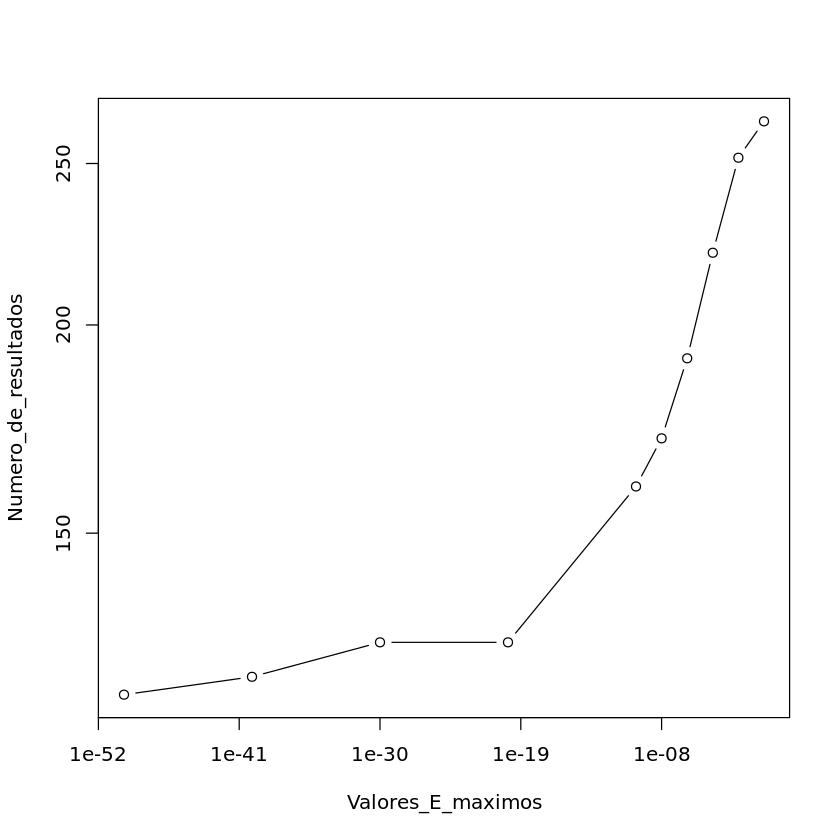

In [16]:
#Para la representación gráfica, podemos usar escala logarítmica solamente en un eje ("log='x'"), 
#en los dos, o en ninguno. Nosotros vamos a utilizar la escala logarítmica en los dos ejes:

plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

A continuación, examino la relación entre la longitud del alineamiento y el valor E de los resultados guardados en la última tabla, la número 10, en la que he usado un valor E de 1 y que contiene un 
mayor número de resultados.

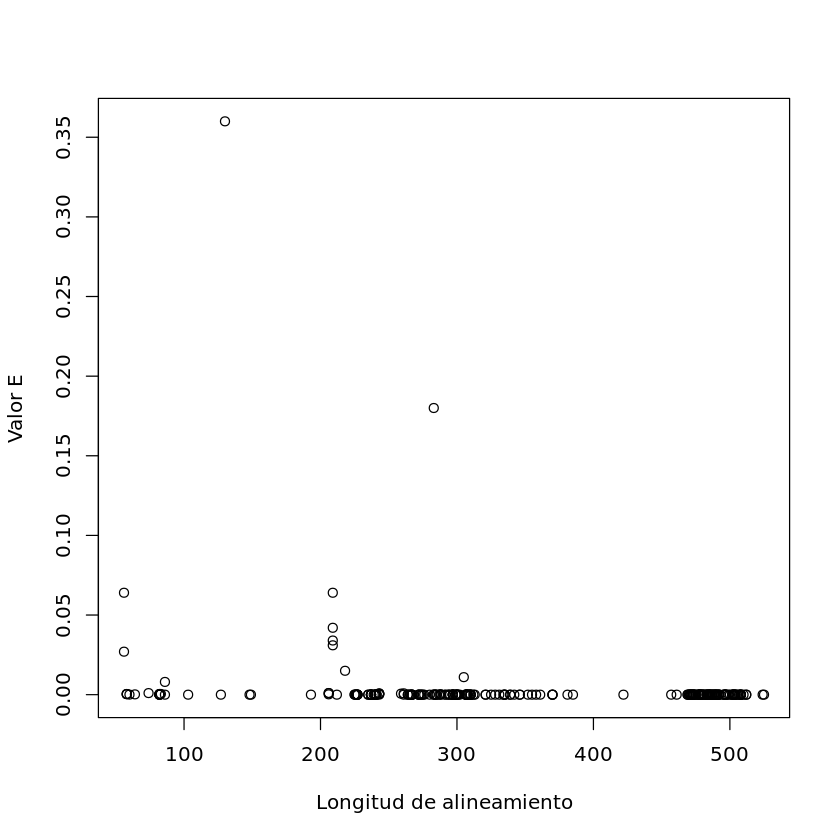

In [19]:
#El símbolo "$" extrae de un "data frame" una columna. Si ejecutamos "Lista_de_Tablas[[3]]$length", 
#veremos que el resultado es el vector de las longitudes de los alineamientos de la tercera tabla, 
#por ejemplo.

plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

Aunque la proteína CHRNA7 es de 502 aminoácidos, existen alineamientos de menos de 100. 
Esto indica que existen muchas proteínas en la base de datos que presentan homología **parcial** con 
CHRNA7. Es decir, que muchos de estos resultados corresponden a proteínas que solo se parecen a 
CHRNA7 en un fragmento concreto; probablemente un dominio de función conservada. 
Cabe preguntar qué posiciones de CHRNA7 son esas que participan en los alineamientos parciales.

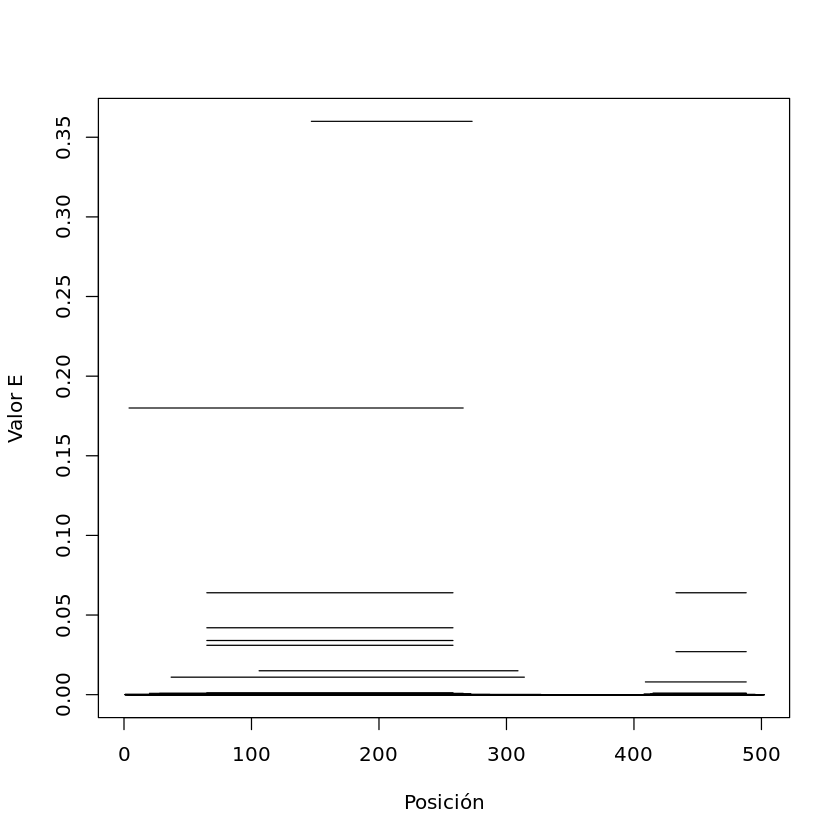

In [25]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

#La función segments() añade segmentos a un gráfico previo. Por eso, representamos antes un gráfico 
#con los rangos adecuados, pero vacío (type='n'). Para determinar el rango del eje horizontal, 
#determino primero el valor máximo de "qend":

AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)


Podemos ver que, la homología encontrada, presenta una mayor concentración entre las posiciones 100 y 300 y, también, entre las posiciones 400 y 500, con e-valores bajos. Pese a esto, se observa homología entre las posiciones 0 y 300, aproximadamente, con un e-valor intermedio entre 0.15 y 0.20. Asimismo, entre las posiciones 150 y 300, las encontramos con un e-valor más elevado, de 0.35.

Por último, procedemos a explorar la distribución taxonómica de las secuencias encontradas. 
La columna `sblastname` nos ofrece una clasificación fácilmente interpretable de las secuencias. 
Una de las posibilidades es contar en cada tabla las secuencias encontradas de cada grupo taxonómico.
Para ello, aplico la función `table()` a esa columna de cada tabla en `Lista_de_Tablas`:

In [26]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  33                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 18                  24                  33                   5 

[[3]]

     

El resultado del código anterior es una lista de recuentos de los diferentes grupos taxonómicos presentes en cada 
tabla de resultados de **blastp**. 

Para ver la relación entre la longitud del alineamiento y la distribución taxonómica, a continuación, repetimos el 
recuento de grupos taxonómicos pero esta vez, contando solamente las secuencias con un alineamiento de al menos 300 
aminoácidos:

In [27]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  33                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 18                  24                  33                   5 

[[3]]

     

Finalmente, al seleccionar solo aquellas secuencias cuya similitud es igual o mayor a 300 aminoácidos con la proteína en cuestión, los resultados disminuyen.

# Referencias: 

Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, Journal of Molecular Biology, Volume 215, Issue 3, 1990, Pages 403-410, https://doi:10.1016/S0022-2836(05)80360-2.

Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, https://doi:10.1093/molbev/msaa252.

Yanagi, M., Southcott, S., Lister, J., & Tamminga, C. A. (2012). Animal models of schizophrenia: Emphasizing 
construct validity. In Progress in Molecular Biology and Translational Science (Vol. 105, pp. 411–444). 
Elsevier B.V. https://doi.org/10.1016/B978-0-12-394596-9.00012-3
